# Name :- Varun B Majithia
# Student id :- 8894799

# Import Necessary Packages 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Import the data 

In [6]:
df = pd.read_csv("CSV//Lab2_dataset.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


# Splitting the data into dependent and independent variable

In [7]:
X = df.iloc[:,2]
y = df.iloc[:,1]

In [8]:
X

0       Subject: enron methanol ; meter # : 988291\nth...
1       Subject: hpl nom for january 9 , 2001\n( see a...
2       Subject: neon retreat\nho ho ho , we ' re arou...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\nthis deal is to ...
                              ...                        
5166    Subject: put the 10 on the ft\nthe transport v...
5167    Subject: 3 / 4 / 2000 and following noms\nhpl ...
5168    Subject: calpine daily gas nomination\n>\n>\nj...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\ndear ...
Name: text, Length: 5171, dtype: object

In [9]:
y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

In [10]:
y.unique()

array(['ham', 'spam'], dtype=object)

In [11]:
y.isnull().sum()

0

In [13]:
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Cleaning the text data using Stemming to extract meaningful words and removed stopwords

In [14]:
porter_stemmer = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    rev = re.sub('[^a-z-A-Z]',' ',df['text'][i])## apart from everything between a-z and A-Z Everything will be replaced by ' '(spaces)
    rev = rev.lower()
    rev = rev.split()## for getting list of words
    rev = [porter_stemmer.stem(word)for word in rev if word not in set(stopwords.words('english'))] # applied
    #stemming to the text to derive meaningful words and removed stopwords for better analysis
    rev = ' '.join(rev)
    corpus.append(rev)

In [15]:
pd.DataFrame(corpus)

,0
0,subject enron methanol meter follow note gave ...
1,subject hpl nom januari see attach file hplnol...
2,subject neon retreat ho ho ho around wonder ti...
3,subject photoshop window offic cheap main tren...
4,subject indian spring deal book teco pvr reven...
...,...
5166,subject put ft transport volum decreas contrac...
5167,subject follow nom hpl take extra mmcf weekend...
5168,subject calpin daili ga nomin juli mention ear...
5169,subject industri worksheet august activ attach...


# Converting the text data to an array using CountVectorizer 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [17]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,37880,37881,37882,37883,37884,37885,37886,37887,37888,37889
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y = df.iloc[:,-1]
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

# Splitting the data into train test split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

# Training the model on Multinomial Naive Bayes

Multinomial Naive Bayes is basically used for discrete features,
and is good when it comes to handling text data.
It performs very well in count of frequencies

In [20]:
from sklearn.naive_bayes import MultinomialNB
clasifier = MultinomialNB()
clasifier.fit(X_train,y_train)

MultinomialNB()

# Predicting using test data

In [21]:
y_pred_multinomial = clasifier.predict(X_test)

# Accuracy score and confusion matrix on Multinomial Naive Bayes

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred_multinomial)
print(cm)
accuracy_score(y_test,y_pred_multinomial)

[[721  11]
 [ 20 283]]


0.970048309178744

# Gaussian Classifier 

In [23]:
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_train, y_train)

GaussianNB()

# Predictions on Gaussian NM

In [24]:
y_pred_gaussian = gaussian_classifier.predict(X_test)

# Accuracy score and confusion matrix on Gaussian Naive Bayes Classifier

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred_gaussian)
print(cm)
accuracy_score(y_test,y_pred_gaussian)

[[718  14]
 [ 35 268]]


0.9526570048309179

# Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
gaussian_scores = cross_val_score(gaussian_classifier, X_train, y_train, cv=10, scoring='accuracy')
gaussian_scores

array([0.95169082, 0.94444444, 0.9589372 , 0.96135266, 0.96376812,
       0.93236715, 0.94188862, 0.9346247 , 0.968523  , 0.94673123])

In [27]:
from sklearn.model_selection import cross_val_score
multinomial_scores = cross_val_score(clasifier, X_train, y_train, cv=10, scoring='accuracy')
multinomial_scores

array([0.98309179, 0.96376812, 0.98067633, 0.98792271, 0.97342995,
       0.97826087, 0.96368039, 0.97820823, 0.99273608, 0.96125908])

## My Inferences on the Part 1 of the Problem Statemnent

#### As discusssed above Multinomial Naive Bayes work excellent with discrete data as well as text data so we can cleary observe that it has produced a higher accuracy on the text data as compared to the Gaussian Naive Bayes. 

#### On the other hand we can observe that Gaussian Naive Bayes has generated a lower accuracy as compared to Multinomial Naive Bayes as it assumes that the data is continuous numerical feature and follows a normal distribution

### Moreover, we can also compare confusionn matrix as follows:

#### True Negative - Multinomial Naive Bayes has correctly predictied 721 true negatives as compared to 718 by Gaussian NB.

#### False Positive - The count of false positive - is 11 for Multinomial NB as compared to 14 for Gaussian NB - which mean that in Gaussian NB the chances of predicting a label as spam which is not originally a spam is higher.

#### False negative - The count of false negative for Multinomial naive bayes is 20 and for Gaussian Nb is 35 meaning Gaussian NB has a higher probability of predict a spam variable as not spam.

#### True Positive - The Count of false postive is 283 for Multinomial NB and is comparitively higher as compared to Gaussian NB - meaning Multinomial NB is better at predicting labels as spam which are originally spam

### Cross Validation

### From the results of both the classifiers we can see that both the classifiers have a consistent accuracy range for all the splits.

# Part B

# Importing the necessary packages 

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

# Improrting the dataset

In [29]:
df2 = pd.read_csv("CSV//AB_NYC_2019.csv")
df2.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [30]:
df2.shape

(48895, 16)

In [31]:
df2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Checking the five summary statistics for variable price

In [32]:
summary_price = pd.DataFrame(df2['price'].describe())
summary_price

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


# Checking count of values falling above 99th percentile

In [33]:
quantile1, quantile3= np.percentile(df2['price'],[25,75])

# 25th Percentile of price 

In [34]:
quantile1

69.0

# 75th Percentile of price 

In [35]:
quantile3

175.0

In [36]:
## Find the IQR

iqr_value=quantile3-quantile1
print(iqr_value)

106.0


# Visualizing variable price 

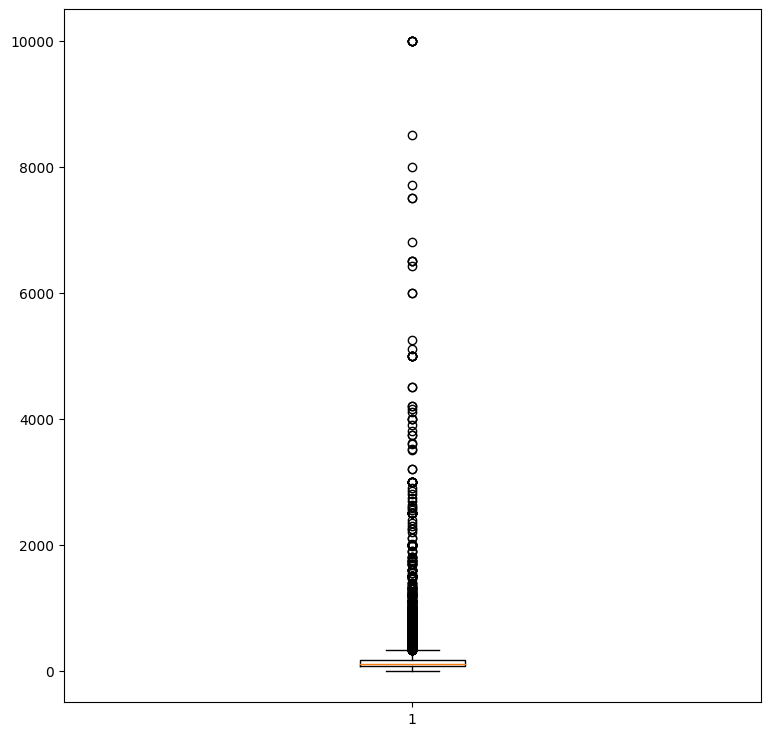

In [37]:
fig = plt.figure(figsize =(9,9))
plt.boxplot(df2['price'])
plt.show()

<Axes: xlabel='price', ylabel='Density'>

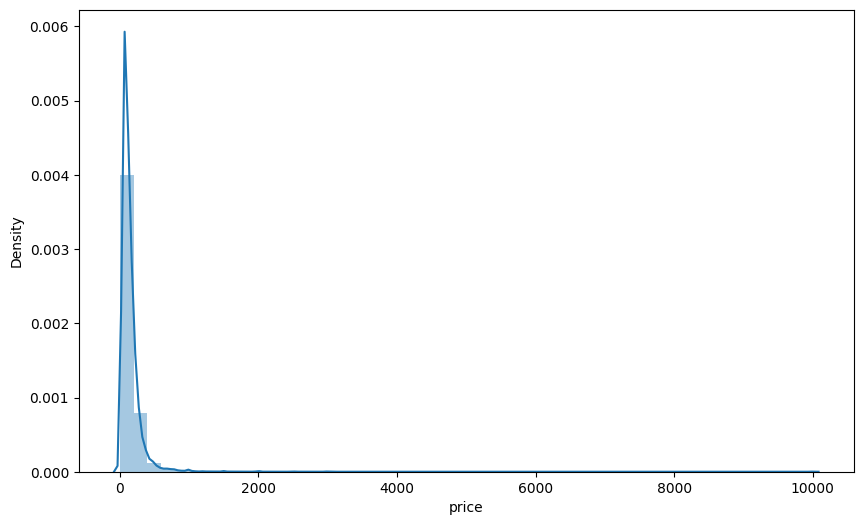

In [38]:
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(figsize =(10,6))
sns.distplot(df2['price'])

In [39]:
# Calculate Q1 and Q3
Quartile_1 = df2['price'].quantile(0.25)
Quartile_3 = df2['price'].quantile(0.75)


# Calculate IQR
Interquartile_range = Quartile_3 - Quartile_1

# Define lower and upper bounds
lower_bound = Quartile_1 - 1.5 * Interquartile_range
upper_bound = Quartile_3 + 1.5 * Interquartile_range

# Remove outliers
df2 = df2[(df2['price'] >= lower_bound) & (df2['price'] <= upper_bound)]

# Visualizing column price after treating with IQR

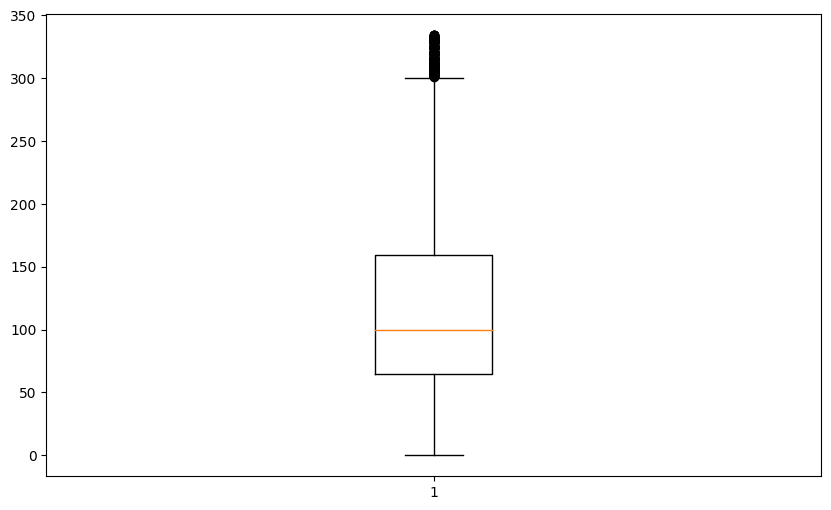

In [40]:
fig = plt.figure(figsize =(10,6))
plt.boxplot(df2['price'])
plt.show()

<Axes: xlabel='price', ylabel='Count'>

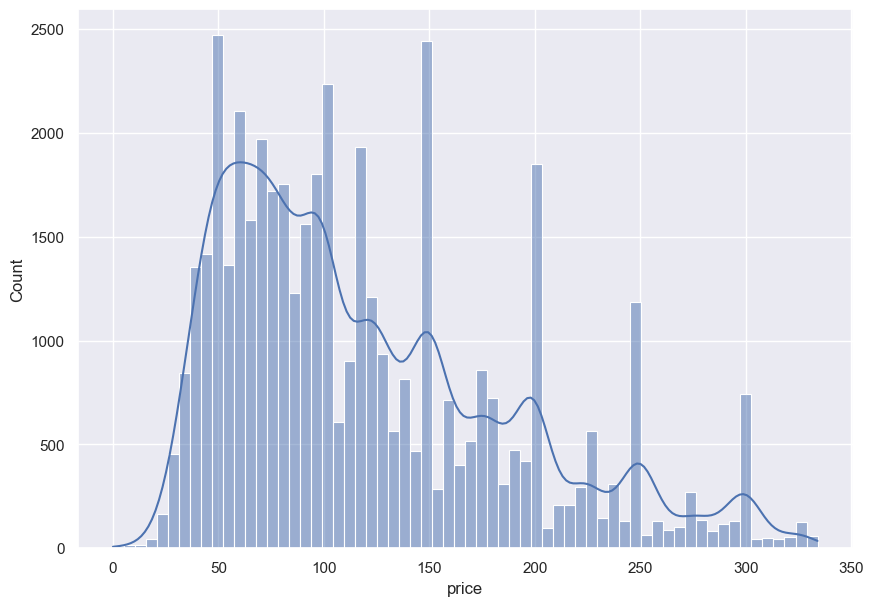

In [41]:
sns.set(style="darkgrid", rc={'figure.figsize':(10,7)}) 
sns.histplot(data=df2, x='price', kde=True)

# My inferences

Outleir detection:-
We have used two techniques to detect the outliers in our dataset one is visulization and one is the summary function.
The describe() function helps us to understand the five summary statistics of our dataset and enables to undertand the spread of the data. In describe function for variable price we can see that there is a strong jump in the prices after 75th percentile and we have to understand that this is a air bnb dataset so there are chances that certain properties may be costly properties.
So there are many techniques we can use to treat these outliers. So some common techniques are mean, median and mode or IQR. But the reason why I did not use these techniques is because using central tendencies might have distroted the data. And if I would have used IQR I would have lost information valuebale for analysis, So the best approch will be using IQR technique to treat the variable price.